Create Dataset

In [1]:
using SyntheticDatasets
using Plots

include("../src/NNJulia.jl")
using .NNJulia

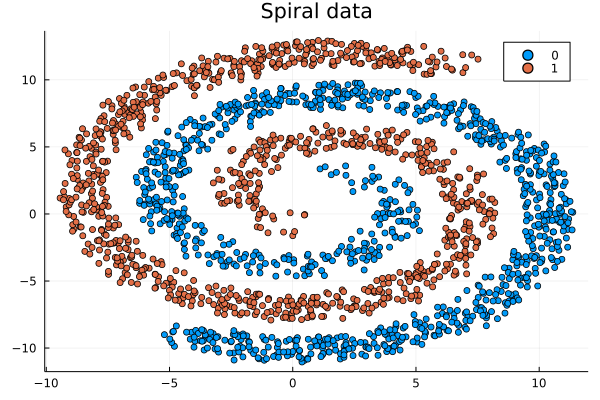

In [2]:
# load dataset
spirals = SyntheticDatasets.make_twospirals(n_samples = 2000, 
                                            start_degrees = 90,
                                            total_degrees = 570, 
                                            noise =1.9);


# plot dataset
scatter(spirals.feature_1,spirals.feature_2,group=spirals.label,title="Spiral data")

In [3]:
# extract inputs and labels from the dataset
xData = permutedims([spirals.feature_1 spirals.feature_2]) # 2x2000
yData = permutedims(spirals.label) #1x2000

# split the dataset into train and test sets
x_train,y_train,x_test,y_test = split_train_test(xData,yData,0.9)


([-4.2955726906895615 6.232233425876567 … 6.270616222980851 -2.2709697655417935; 9.935371258333323 -7.576077602454722 … -2.4251122974166655 -2.873931586961924], [1 0 … 1 0], [2.939475184670616 5.405406853533673 … -0.1568930146667198 10.095882768725847; 9.091830741986493 8.022201528343249 … -3.1048022820648953 -3.53920992908895], [0 0 … 0 0])

In [4]:
# Create the model
model = Sequential(
        Dense(2, 16, leakyrelu),
        Dense(16, 16, leakyrelu),
        Dense(16, 1, sigmoid),
    )

Sequential with : 3 layer


Dense: 2 --> 16
weight: (16, 2)
bias: (16,)
activation function: leakyrelu
Dense: 16 --> 16
weight: (16, 16)
bias: (16,)
activation function: leakyrelu
Dense: 16 --> 1
weight: (1, 16)
bias: (1,)
activation function: sigmoid


In [5]:
# Initialise the optimiser, the loss function and the metrics used to compute accuracy
opt = GradientDescent(0.01)
loss = BinaryCrossentropy()
metrics = BinaryAccuracy(0.8)

# Pass it to the TrainParameters struct that will be used during training
trainParams = TrainParameters(opt, loss, metrics)

# Training specifications
batchsize = 64
nbEpochs = 400

400

In [6]:
# Load the train data into a dataloader that will split the data
# into shuffled batches
trainData = DataLoader(x_train, y_train, batchsize,true)

DataLoader{Union{Float64, Int64, AbstractArray}, Union{Float64, Int64, AbstractArray}}([-4.2955726906895615 6.232233425876567 … 6.270616222980851 -2.2709697655417935; 9.935371258333323 -7.576077602454722 … -2.4251122974166655 -2.873931586961924], [1 0 … 1 0], 64, [1, 65, 129, 193, 257, 321, 385, 449, 513, 577  …  1217, 1281, 1345, 1409, 1473, 1537, 1601, 1665, 1729, 1793], true, 29)

In [7]:
# train the model
history = train!(model, trainParams, trainData, nbEpochs)

Epoch 1 : accuracy = 0.5285560344827587, loss = 33.46944759794374
Epoch 2 : accuracy = 0.5501077586206896, loss = 19.489032650377826
Epoch 3 : accuracy = 0.5274784482758621, loss = 18.347654878788717
Epoch 4 : accuracy = 0.5447198275862069, loss = 17.92901410604117
Epoch 5 : accuracy = 0.5603448275862069, loss = 17.71315943602152
Epoch 6 : accuracy = 0.5635775862068966, loss = 17.46986637013564
Epoch 7 : accuracy = 0.5700431034482759, loss = 17.37462599159348
Epoch 8 : accuracy = 0.5716594827586207, loss = 17.23138062449402
Epoch 9 : accuracy = 0.572198275862069, loss = 17.056732441835926
Epoch 10 : accuracy = 0.5727370689655172, loss = 16.94555200412063
Epoch 11 : accuracy = 0.584051724137931, loss = 16.885537467234023
Epoch 12 : accuracy = 0.5915948275862069, loss = 16.778620117268506
Epoch 13 : accuracy = 0.584051724137931, loss = 16.72001305822264
Epoch 14 : accuracy = 0.5921336206896551, loss = 16.59055027689635


Epoch 15 : accuracy = 0.5883620689655172, loss = 16.622244085629603
Epoch 16 : accuracy = 0.5932112068965517, loss = 16.505641863120026
Epoch 17 : accuracy = 0.5915948275862069, loss = 16.451702783949823
Epoch 18 : accuracy = 0.5872844827586207, loss = 16.409377764471603
Epoch 19 : accuracy = 0.5905172413793104, loss = 16.365397232824026
Epoch 20 : accuracy = 0.59375, loss = 16.354499796892576
Epoch 21 : accuracy = 0.6072198275862069, loss = 16.299697606166053
Epoch 22 : accuracy = 0.5932112068965517, loss = 16.267896807827704
Epoch 23 : accuracy = 0.6050646551724138, loss = 16.145587777277846
Epoch 24 : accuracy = 0.6039870689655172, loss = 16.174840345530345
Epoch 25 : accuracy = 0.6012931034482759, loss = 16.173112136628617
Epoch 26 : accuracy = 0.6109913793103449, loss = 16.10478206397446
Epoch 27 : accuracy = 0.6082974137931034, loss = 16.061476148215746
Epoch 28 : accuracy = 0.6142241379310345, loss = 16.028174247433142
Epoch 29 : accuracy = 0.6174568965517241, loss = 15.94444001

Epoch 32 : accuracy = 0.6136853448275862, loss = 15.836189398213175
Epoch 33 : accuracy = 0.6320043103448276, loss = 15.783669991145262
Epoch 34 : accuracy = 0.6201508620689655, loss = 15.746128862255677
Epoch 35 : accuracy = 0.634698275862069, loss = 15.713172148688505
Epoch 36 : accuracy = 0.6276939655172413, loss = 15.692123751630758
Epoch 37 : accuracy = 0.6325431034482759, loss = 15.650273722677142
Epoch 38 : accuracy = 0.6330818965517241, loss = 15.552739329609533
Epoch 39 : accuracy = 0.646551724137931, loss = 15.499098369316673
Epoch 40 : accuracy = 0.6373922413793104, loss = 15.517913053043749
Epoch 41 : accuracy = 0.6363146551724138, loss = 15.489848272359609
Epoch 42 : accuracy = 0.6368534482758621, loss = 15.427986383864994
Epoch 43 : accuracy = 0.6470905172413793, loss = 15.374594189985316
Epoch 44 : accuracy = 0.6578663793103449, loss = 15.337267892696214
Epoch 45 : accuracy = 0.6492456896551724, loss = 15.31539772262385
Epoch 46 : accuracy = 0.6497844827586207, loss = 15

Epoch 49 : accuracy = 0.6519396551724138, loss = 15.142301617448691
Epoch 50 : accuracy = 0.6519396551724138, loss = 15.11866907115014
Epoch 51 : accuracy = 0.6589439655172413, loss = 15.039618407511572
Epoch 52 : accuracy = 0.6589439655172413, loss = 14.992937843830479
Epoch 53 : accuracy = 0.6514008620689655, loss = 14.994931718997796
Epoch 54 : accuracy = 0.6578663793103449, loss = 14.954997899164674
Epoch 55 : accuracy = 0.6578663793103449, loss = 14.909962067945791
Epoch 56 : accuracy = 0.6627155172413793, loss = 14.91729726275344
Epoch 57 : accuracy = 0.6584051724137931, loss = 14.851376904003015
Epoch 58 : accuracy = 0.6508620689655172, loss = 14.80355085578931
Epoch 59 : accuracy = 0.6675646551724138, loss = 14.786424852762297
Epoch 60 : accuracy = 0.6702586206896551, loss = 14.712166992749713
Epoch 61 : accuracy = 0.6643318965517241, loss = 14.702244321465463
Epoch 62 : accuracy = 0.6724137931034483, loss = 14.647485285524844
Epoch 63 : accuracy = 0.671875, loss = 14.595681654

Epoch 66 : accuracy = 0.6821120689655172, loss = 14.531764863714528
Epoch 67 : accuracy = 0.6729525862068966, loss = 14.493496386947713
Epoch 68 : accuracy = 0.677801724137931, loss = 14.362557207489232
Epoch 69 : accuracy = 0.6772629310344828, loss = 14.373643238344139
Epoch 70 : accuracy = 0.6853448275862069, loss = 14.32777910538617
Epoch 71 : accuracy = 0.6804956896551724, loss = 14.265702708337361
Epoch 72 : accuracy = 0.6891163793103449, loss = 14.218627157097515
Epoch 73 : accuracy = 0.6858836206896551, loss = 14.128344910210831
Epoch 74 : accuracy = 0.6896551724137931, loss = 14.09924219553128
Epoch 75 : accuracy = 0.6901939655172413, loss = 14.072594616454051
Epoch 76 : accuracy = 0.697198275862069, loss = 13.990255678424214
Epoch 77 : accuracy = 0.6945043103448276, loss = 13.951319624951905
Epoch 78 : accuracy = 0.6977370689655172, loss = 13.93023138098102
Epoch 79 : accuracy = 0.6982758620689655, loss = 13.8466627472293
Epoch 80 : accuracy = 0.6982758620689655, loss = 13.777

Epoch 83 : accuracy = 0.7042025862068966, loss = 13.660829120782711
Epoch 84 : accuracy = 0.6998922413793104, loss = 13.599993224114725
Epoch 85 : accuracy = 0.7112068965517241, loss = 13.522647538828783
Epoch 86 : accuracy = 0.6982758620689655, loss = 13.476380220728462
Epoch 87 : accuracy = 0.7106681034482759, loss = 13.441116281452976
Epoch 88 : accuracy = 0.7042025862068966, loss = 13.376101704139309
Epoch 89 : accuracy = 0.703125, loss = 13.301685094207816
Epoch 90 : accuracy = 0.7117456896551724, loss = 13.242985864210906
Epoch 91 : accuracy = 0.7074353448275862, loss = 13.13848468719046
Epoch 92 : accuracy = 0.709051724137931, loss = 13.062474977067687
Epoch 93 : accuracy = 0.7144396551724138, loss = 13.057821419794859
Epoch 94 : accuracy = 0.7112068965517241, loss = 12.958785015353968
Epoch 95 : accuracy = 0.7122844827586207, loss = 12.883570949571721
Epoch 96 : accuracy = 0.712823275862069, loss = 12.811979888682862
Epoch 97 : accuracy = 0.7171336206896551, loss = 12.774365082

Epoch 100 : accuracy = 0.7171336206896551, loss = 12.561008287077566
Epoch 101 : accuracy = 0.7214439655172413, loss = 12.48081300266476
Epoch 102 : accuracy = 0.71875, loss = 12.448895123885032
Epoch 103 : accuracy = 0.7198275862068966, loss = 12.34617313506874
Epoch 104 : accuracy = 0.7209051724137931, loss = 12.321338617190417
Epoch 105 : accuracy = 0.7192887931034483, loss = 12.253965469643273
Epoch 106 : accuracy = 0.7192887931034483, loss = 12.193941871711017
Epoch 107 : accuracy = 0.7214439655172413, loss = 12.159706627550415
Epoch 108 : accuracy = 0.7203663793103449, loss = 12.03974279159636
Epoch 109 : accuracy = 0.7209051724137931, loss = 11.988133231247932
Epoch 110 : accuracy = 0.7219827586206896, loss = 11.856082904396162
Epoch 111 : accuracy = 0.7165948275862069, loss = 11.90160353433455
Epoch 112 : accuracy = 0.71875, loss = 11.80683330707839
Epoch 113 : accuracy = 0.7219827586206896, loss = 11.734944585032165
Epoch 114 : accuracy = 0.7165948275862069, loss = 11.70538460

Epoch 118 : accuracy = 0.71875, loss = 11.447953494136044
Epoch 119 : accuracy = 0.7182112068965517, loss = 11.37756090459465
Epoch 120 : accuracy = 0.7252155172413793, loss = 11.356118214635389
Epoch 121 : accuracy = 0.7214439655172413, loss = 11.234532519077076
Epoch 122 : accuracy = 0.71875, loss = 11.234398876718599
Epoch 123 : accuracy = 0.71875, loss = 11.140051795776797
Epoch 124 : accuracy = 0.71875, loss = 11.123533437365703
Epoch 125 : accuracy = 0.7192887931034483, loss = 11.080787624725716
Epoch 126 : accuracy = 0.7209051724137931, loss = 10.988727859334052
Epoch 127 : accuracy = 0.7225215517241379, loss = 10.966965453053037
Epoch 128 : accuracy = 0.7182112068965517, loss = 10.907397757854515
Epoch 129 : accuracy = 0.7192887931034483, loss = 10.876501943122847
Epoch 130 : accuracy = 0.7182112068965517, loss = 10.81162171328242
Epoch 131 : accuracy = 0.7235991379310345, loss = 10.790913608947603
Epoch 132 : accuracy = 0.7230603448275862, loss = 10.705456815621895
Epoch 133 :

Epoch 136 : accuracy = 0.7252155172413793, loss = 10.509802736017264
Epoch 137 : accuracy = 0.7241379310344828, loss = 10.445309716050064
Epoch 138 : accuracy = 0.7262931034482759, loss = 10.45878349900562
Epoch 139 : accuracy = 0.7279094827586207, loss = 10.409796117049353
Epoch 140 : accuracy = 0.7241379310344828, loss = 10.31797412157929
Epoch 141 : accuracy = 0.7295258620689655, loss = 10.301154785449299
Epoch 142 : accuracy = 0.7273706896551724, loss = 10.242047833735691
Epoch 143 : accuracy = 0.7295258620689655, loss = 10.226005125897885
Epoch 144 : accuracy = 0.7370689655172413, loss = 10.145328497772939
Epoch 145 : accuracy = 0.7300646551724138, loss = 10.083508476247058
Epoch 146 : accuracy = 0.7332974137931034, loss = 10.080011784744297
Epoch 147 : accuracy = 0.7338362068965517, loss = 10.01174701053193
Epoch 148 : accuracy = 0.7370689655172413, loss = 9.952343291118419
Epoch 149 : accuracy = 0.7349137931034483, loss = 9.888521854914094
Epoch 150 : accuracy = 0.73491379310344

Epoch 153 : accuracy = 0.7376077586206896, loss = 9.71167446708361
Epoch 154 : accuracy = 0.7381465517241379, loss = 9.693186501924426
Epoch 155 : accuracy = 0.7392241379310345, loss = 9.638482295067046
Epoch 156 : accuracy = 0.7381465517241379, loss = 9.601163376076356
Epoch 157 : accuracy = 0.7392241379310345, loss = 9.545485479585247
Epoch 158 : accuracy = 0.7381465517241379, loss = 9.500613602941623
Epoch 159 : accuracy = 0.7424568965517241, loss = 9.437823079421749
Epoch 160 : accuracy = 0.7424568965517241, loss = 9.418497771964322
Epoch 161 : accuracy = 0.7424568965517241, loss = 9.394685522874932
Epoch 162 : accuracy = 0.7473060344827587, loss = 9.304813045542112
Epoch 163 : accuracy = 0.7478448275862069, loss = 9.286704596443828
Epoch 164 : accuracy = 0.7521551724137931, loss = 9.183957484964262
Epoch 165 : accuracy = 0.7521551724137931, loss = 9.204464006565798
Epoch 166 : accuracy = 0.7478448275862069, loss = 9.15040022347226
Epoch 167 : accuracy = 0.7521551724137931, loss = 

Epoch 170 : accuracy = 0.7543103448275862, loss = 8.968077855574544
Epoch 171 : accuracy = 0.755926724137931, loss = 8.911077278358508
Epoch 172 : accuracy = 0.7553879310344828, loss = 8.86134569059702
Epoch 173 : accuracy = 0.7580818965517241, loss = 8.799526000423722
Epoch 174 : accuracy = 0.7634698275862069, loss = 8.798818118264103
Epoch 175 : accuracy = 0.7586206896551724, loss = 8.764358204562347
Epoch 176 : accuracy = 0.7650862068965517, loss = 8.704031939623565
Epoch 177 : accuracy = 0.7634698275862069, loss = 8.65721179036534
Epoch 178 : accuracy = 0.7602370689655172, loss = 8.64664058539356
Epoch 179 : accuracy = 0.7699353448275862, loss = 8.547377200512333
Epoch 180 : accuracy = 0.7683189655172413, loss = 8.545538766402647
Epoch 181 : accuracy = 0.7688577586206896, loss = 8.504801942715519
Epoch 182 : accuracy = 0.7645474137931034, loss = 8.433147524135721
Epoch 183 : accuracy = 0.7640086206896551, loss = 8.424632168683353
Epoch 184 : accuracy = 0.7688577586206896, loss = 8.

Epoch 187 : accuracy = 0.7737068965517241, loss = 8.23231380404237
Epoch 188 : accuracy = 0.7726293103448276, loss = 8.202531569922968
Epoch 189 : accuracy = 0.7737068965517241, loss = 8.177266935149289
Epoch 190 : accuracy = 0.7817887931034483, loss = 8.100165809577591
Epoch 191 : accuracy = 0.7823275862068966, loss = 8.070609539724423
Epoch 192 : accuracy = 0.7790948275862069, loss = 8.00600844722561
Epoch 193 : accuracy = 0.7801724137931034, loss = 7.967649026197382
Epoch 194 : accuracy = 0.7801724137931034, loss = 7.969141426589484
Epoch 195 : accuracy = 0.7769396551724138, loss = 7.883582811963524
Epoch 196 : accuracy = 0.7807112068965517, loss = 7.864187349820388
Epoch 197 : accuracy = 0.7839439655172413, loss = 7.82730510550291
Epoch 198 : accuracy = 0.7882543103448276, loss = 7.781280326941008
Epoch 199 : accuracy = 0.7877155172413793, loss = 7.720398072101925
Epoch 200 : accuracy = 0.7936422413793104, loss = 7.6461937369821
Epoch 201 : accuracy = 0.7941810344827587, loss = 7.6

Epoch 204 : accuracy = 0.7925646551724138, loss = 7.5103662407308915
Epoch 205 : accuracy = 0.7947198275862069, loss = 7.49291797943251
Epoch 206 : accuracy = 0.8011853448275862, loss = 7.433446003917777
Epoch 207 : accuracy = 0.8022629310344828, loss = 7.38112924723454
Epoch 208 : accuracy = 0.7936422413793104, loss = 7.373139845875362
Epoch 209 : accuracy = 0.7925646551724138, loss = 7.346701928705779
Epoch 210 : accuracy = 0.8006465517241379, loss = 7.282553407892635
Epoch 211 : accuracy = 0.7995689655172413, loss = 7.2651869775333875
Epoch 212 : accuracy = 0.8022629310344828, loss = 7.255922699412136
Epoch 213 : accuracy = 0.8001077586206896, loss = 7.180310583319881
Epoch 214 : accuracy = 0.8006465517241379, loss = 7.166221409286692
Epoch 215 : accuracy = 0.8060344827586207, loss = 7.087159556842517
Epoch 216 : accuracy = 0.8049568965517241, loss = 7.073141477190709
Epoch 217 : accuracy = 0.8103448275862069, loss = 7.03427710742465
Epoch 218 : accuracy = 0.8092672413793104, loss =

Epoch 221 : accuracy = 0.8189655172413793, loss = 6.88929431503528
Epoch 222 : accuracy = 0.8157327586206896, loss = 6.814370392191672
Epoch 223 : accuracy = 0.8103448275862069, loss = 6.829291780186646
Epoch 224 : accuracy = 0.8275862068965517, loss = 6.721720572766223
Epoch 225 : accuracy = 0.8189655172413793, loss = 6.721457668046956
Epoch 226 : accuracy = 0.8189655172413793, loss = 6.711077706686603
Epoch 227 : accuracy = 0.8265086206896551, loss = 6.662340606067068
Epoch 228 : accuracy = 0.8195043103448276, loss = 6.610013711433726
Epoch 229 : accuracy = 0.8313577586206896, loss = 6.604337172601223
Epoch 230 : accuracy = 0.8232758620689655, loss = 6.576967999440109
Epoch 231 : accuracy = 0.8232758620689655, loss = 6.546796419756656
Epoch 232 : accuracy = 0.8270474137931034, loss = 6.479397967487583
Epoch 233 : accuracy = 0.8265086206896551, loss = 6.487327427312913
Epoch 234 : accuracy = 0.8286637931034483, loss = 6.411293761832086
Epoch 235 : accuracy = 0.8383620689655172, loss =

Epoch 238 : accuracy = 0.8405172413793104, loss = 6.302005163019624
Epoch 239 : accuracy = 0.834051724137931, loss = 6.260938695909257
Epoch 240 : accuracy = 0.8356681034482759, loss = 6.252426599231283
Epoch 241 : accuracy = 0.8405172413793104, loss = 6.17064172683028
Epoch 242 : accuracy = 0.8329741379310345, loss = 6.189535406691734
Epoch 243 : accuracy = 0.8464439655172413, loss = 6.100280670919278
Epoch 244 : accuracy = 0.8415948275862069, loss = 6.070056189277992
Epoch 245 : accuracy = 0.8426724137931034, loss = 6.070064767830444
Epoch 246 : accuracy = 0.84375, loss = 6.008270765474142
Epoch 247 : accuracy = 0.8475215517241379, loss = 6.0577443862554565
Epoch 248 : accuracy = 0.8502155172413793, loss = 5.975226741929585
Epoch 249 : accuracy = 0.8502155172413793, loss = 5.9255330920589095
Epoch 250 : accuracy = 0.8464439655172413, loss = 5.886268484683813
Epoch 251 : accuracy = 0.8512931034482759, loss = 5.859613737424314
Epoch 252 : accuracy = 0.8459051724137931, loss = 5.8587491

Epoch 255 : accuracy = 0.8502155172413793, loss = 5.739506507021863
Epoch 256 : accuracy = 0.8459051724137931, loss = 5.714476638847906
Epoch 257 : accuracy = 0.8507543103448276, loss = 5.672102217767879
Epoch 258 : accuracy = 0.8561422413793104, loss = 5.640847591892498
Epoch 259 : accuracy = 0.8502155172413793, loss = 5.620530201282208
Epoch 260 : accuracy = 0.8523706896551724, loss = 5.588460941260172
Epoch 261 : accuracy = 0.8518318965517241, loss = 5.542940847624925
Epoch 262 : accuracy = 0.8518318965517241, loss = 5.543022752098859
Epoch 263 : accuracy = 0.8609913793103449, loss = 5.512010771156737
Epoch 264 : accuracy = 0.8588362068965517, loss = 5.472459873462485
Epoch 265 : accuracy = 0.8572198275862069, loss = 5.473829682741188
Epoch 266 : accuracy = 0.8615301724137931, loss = 5.417876196137318
Epoch 267 : accuracy = 0.859375, loss = 5.392849420313874
Epoch 268 : accuracy = 0.8636853448275862, loss = 5.342642469584739
Epoch 269 : accuracy = 0.8582974137931034, loss = 5.362615

Epoch 272 : accuracy = 0.8642241379310345, loss = 5.2582575666381635
Epoch 273 : accuracy = 0.8674568965517241, loss = 5.228588831261008
Epoch 274 : accuracy = 0.869073275862069, loss = 5.196031200181166
Epoch 275 : accuracy = 0.869073275862069, loss = 5.195153029301826
Epoch 276 : accuracy = 0.8658405172413793, loss = 5.154467636959151
Epoch 277 : accuracy = 0.8733836206896551, loss = 5.1317561754123
Epoch 278 : accuracy = 0.8669181034482759, loss = 5.096726854688552
Epoch 279 : accuracy = 0.8723060344827587, loss = 5.084246078875862
Epoch 280 : accuracy = 0.8723060344827587, loss = 5.025680251728292
Epoch 281 : accuracy = 0.8728448275862069, loss = 5.012605596146935
Epoch 282 : accuracy = 0.8723060344827587, loss = 5.0345091161152125
Epoch 283 : accuracy = 0.8776939655172413, loss = 4.952676780716901
Epoch 284 : accuracy = 0.8766163793103449, loss = 4.947565725546595
Epoch 285 : accuracy = 0.8755387931034483, loss = 4.914952035524456
Epoch 286 : accuracy = 0.8841594827586207, loss = 

Epoch 289 : accuracy = 0.8776939655172413, loss = 4.839089044840112
Epoch 290 : accuracy = 0.8793103448275862, loss = 4.821197433767059
Epoch 291 : accuracy = 0.8836206896551724, loss = 4.80027790003122
Epoch 292 : accuracy = 0.8782327586206896, loss = 4.78333856673073
Epoch 293 : accuracy = 0.8868534482758621, loss = 4.759947981371544
Epoch 294 : accuracy = 0.8798491379310345, loss = 4.736781142538635
Epoch 295 : accuracy = 0.8825431034482759, loss = 4.712985225680559
Epoch 296 : accuracy = 0.8879310344827587, loss = 4.691502739560174
Epoch 297 : accuracy = 0.8890086206896551, loss = 4.6600369345803765
Epoch 298 : accuracy = 0.8836206896551724, loss = 4.612993767947767
Epoch 299 : accuracy = 0.8863146551724138, loss = 4.578651885393911
Epoch 300 : accuracy = 0.8825431034482759, loss = 4.528333519685118
Epoch 301 : accuracy = 0.8900862068965517, loss = 4.520210121717596
Epoch 302 : accuracy = 0.8927801724137931, loss = 4.469873387039184
Epoch 303 : accuracy = 0.8890086206896551, loss =

Epoch 306 : accuracy = 0.8884698275862069, loss = 4.355093947921244
Epoch 307 : accuracy = 0.890625, loss = 4.332885898633981
Epoch 308 : accuracy = 0.8890086206896551, loss = 4.302326769932026
Epoch 309 : accuracy = 0.8927801724137931, loss = 4.270529372565311
Epoch 310 : accuracy = 0.8911637931034483, loss = 4.246801991880758
Epoch 311 : accuracy = 0.8917025862068966, loss = 4.2412591560729656
Epoch 312 : accuracy = 0.896551724137931, loss = 4.231141932230561
Epoch 313 : accuracy = 0.8997844827586207, loss = 4.184721695831462
Epoch 314 : accuracy = 0.8987068965517241, loss = 4.183103850558935
Epoch 315 : accuracy = 0.8949353448275862, loss = 4.159408670744702
Epoch 316 : accuracy = 0.8900862068965517, loss = 4.145767501529226
Epoch 317 : accuracy = 0.8992456896551724, loss = 4.098027979326393
Epoch 318 : accuracy = 0.9014008620689655, loss = 4.077525496543553
Epoch 319 : accuracy = 0.9057112068965517, loss = 4.064942991054568
Epoch 320 : accuracy = 0.9014008620689655, loss = 4.046702

Epoch 322 : accuracy = 0.9035560344827587, loss = 4.008800415860226
Epoch 323 : accuracy = 0.9024784482758621, loss = 3.987949705154505
Epoch 324 : accuracy = 0.9057112068965517, loss = 3.9721717570030988
Epoch 325 : accuracy = 0.9035560344827587, loss = 3.944219695548827
Epoch 326 : accuracy = 0.9019396551724138, loss = 3.9325007786947954
Epoch 327 : accuracy = 0.9040948275862069, loss = 3.92177593362397
Epoch 328 : accuracy = 0.9110991379310345, loss = 3.893382880413502
Epoch 329 : accuracy = 0.9078663793103449, loss = 3.8493493148203712
Epoch 330 : accuracy = 0.9105603448275862, loss = 3.842956496777459
Epoch 331 : accuracy = 0.9116379310344828, loss = 3.858124912064838
Epoch 332 : accuracy = 0.9089439655172413, loss = 3.8057287250915857
Epoch 333 : accuracy = 0.9116379310344828, loss = 3.7958556171373394
Epoch 334 : accuracy = 0.9084051724137931, loss = 3.800459604751455
Epoch 335 : accuracy = 0.9148706896551724, loss = 3.7375539293107245
Epoch 336 : accuracy = 0.9127155172413793, 

Epoch 337 : accuracy = 0.9116379310344828, loss = 3.7096464282233454
Epoch 338 : accuracy = 0.9164870689655172, loss = 3.712286450315903
Epoch 339 : accuracy = 0.9175646551724138, loss = 3.692520667570345
Epoch 340 : accuracy = 0.9175646551724138, loss = 3.6830348829911546
Epoch 341 : accuracy = 0.915948275862069, loss = 3.6772350183106672
Epoch 342 : accuracy = 0.9197198275862069, loss = 3.644916706172298
Epoch 343 : accuracy = 0.9164870689655172, loss = 3.62278672987798
Epoch 344 : accuracy = 0.9197198275862069, loss = 3.611732302136407
Epoch 345 : accuracy = 0.9154094827586207, loss = 3.5924324498552966
Epoch 346 : accuracy = 0.9164870689655172, loss = 3.6089922235089604
Epoch 347 : accuracy = 0.9229525862068966, loss = 3.560699933231461
Epoch 348 : accuracy = 0.921875, loss = 3.559789414553973
Epoch 349 : accuracy = 0.915948275862069, loss = 3.5574563319095214
Epoch 350 : accuracy = 0.9197198275862069, loss = 3.5330508662542286
Epoch 351 : accuracy = 0.9202586206896551, loss = 3.48

Epoch 352 : accuracy = 0.9224137931034483, loss = 3.496551624656597
Epoch 353 : accuracy = 0.9181034482758621, loss = 3.476961707060423
Epoch 354 : accuracy = 0.9234913793103449, loss = 3.4589670314099767
Epoch 355 : accuracy = 0.9240301724137931, loss = 3.4375010353613216
Epoch 356 : accuracy = 0.9256465517241379, loss = 3.423527839686662
Epoch 357 : accuracy = 0.9245689655172413, loss = 3.4189131238536787
Epoch 358 : accuracy = 0.9299568965517241, loss = 3.406583426390779
Epoch 359 : accuracy = 0.9256465517241379, loss = 3.3678615499171833
Epoch 360 : accuracy = 0.9283405172413793, loss = 3.3786543750159064
Epoch 361 : accuracy = 0.9251077586206896, loss = 3.3586976022329242
Epoch 362 : accuracy = 0.9261853448275862, loss = 3.3291272468342505
Epoch 363 : accuracy = 0.9272629310344828, loss = 3.31161240881657
Epoch 364 : accuracy = 0.9304956896551724, loss = 3.305698250338579
Epoch 365 : accuracy = 0.9304956896551724, loss = 3.2861867757929564
Epoch 366 : accuracy = 0.9251077586206896

Epoch 368 : accuracy = 0.9256465517241379, loss = 3.253299980463945
Epoch 369 : accuracy = 0.9272629310344828, loss = 3.2283043983498985
Epoch 370 : accuracy = 0.9272629310344828, loss = 3.2327278256681407
Epoch 371 : accuracy = 0.9331896551724138, loss = 3.201837850172697
Epoch 372 : accuracy = 0.931573275862069, loss = 3.1957137106245947
Epoch 373 : accuracy = 0.9294181034482759, loss = 3.1765737688252482
Epoch 374 : accuracy = 0.9310344827586207, loss = 3.164980353487635
Epoch 375 : accuracy = 0.931573275862069, loss = 3.1393638499964958
Epoch 376 : accuracy = 0.9321120689655172, loss = 3.1554237022119334
Epoch 377 : accuracy = 0.9331896551724138, loss = 3.118640651988298
Epoch 378 : accuracy = 0.9369612068965517, loss = 3.1035189114351387
Epoch 379 : accuracy = 0.9353448275862069, loss = 3.0930763739230978
Epoch 380 : accuracy = 0.9369612068965517, loss = 3.087611054680597
Epoch 381 : accuracy = 0.9299568965517241, loss = 3.065633116919602
Epoch 382 : accuracy = 0.9396551724137931,

Epoch 384 : accuracy = 0.9391163793103449, loss = 3.01616994041729
Epoch 385 : accuracy = 0.9321120689655172, loss = 3.021619892588716
Epoch 386 : accuracy = 0.9375, loss = 3.0111879597404054
Epoch 387 : accuracy = 0.9380387931034483, loss = 3.0009181626348065
Epoch 388 : accuracy = 0.9380387931034483, loss = 2.976036890625813
Epoch 389 : accuracy = 0.9423491379310345, loss = 2.955393135840128
Epoch 390 : accuracy = 0.9375, loss = 2.974569634593249
Epoch 391 : accuracy = 0.9423491379310345, loss = 2.93851768658542
Epoch 392 : accuracy = 0.9412715517241379, loss = 2.9226223967764278
Epoch 393 : accuracy = 0.9418103448275862, loss = 2.9024425599075405
Epoch 394 : accuracy = 0.9353448275862069, loss = 2.90320131860473
Epoch 395 : accuracy = 0.9477370689655172, loss = 2.893518858454516
Epoch 396 : accuracy = 0.9385775862068966, loss = 2.887483614431963
Epoch 397 : accuracy = 0.9423491379310345, loss = 2.8631635051990942
Epoch 398 : accuracy = 0.9412715517241379, loss = 2.8835686783785333
E

Dict{String, Vector{Float64}} with 2 entries:
  "accuracy" => [0.528556, 0.550108, 0.527478, 0.54472, 0.560345, 0.563578, 0.5…
  "loss"     => [33.4694, 19.489, 18.3477, 17.929, 17.7132, 17.4699, 17.3746, 1…

In [8]:
# evaluate the model on the test set
acc = evaluate(model,metrics,x_test,y_test)
println("accuracy on test data = " * string(acc*100) * "%")

accuracy on test data = 90.0%


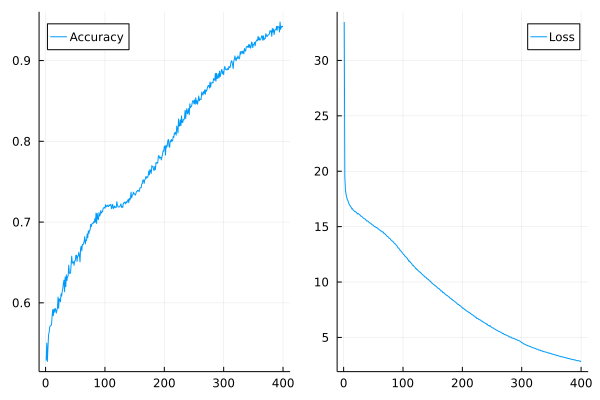

In [17]:
p1 = plot(history["accuracy"],label="Accuracy",legend=:topleft)
p2 = plot(history["loss"],label="Loss")
plot(p1,p2,layout=2)

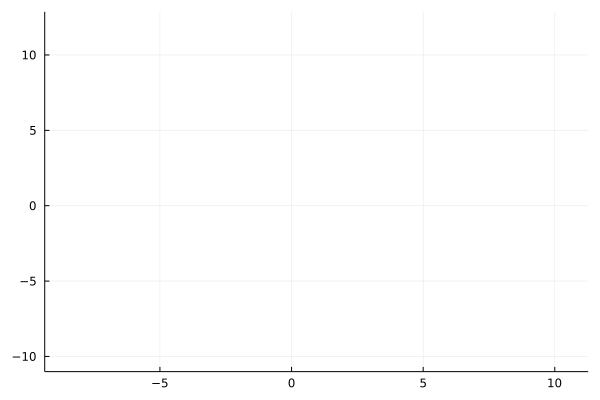

Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.


In [10]:
ccol = cgrad([RGB(1,.3,.3), RGB(.4,1,.4)])
mcol = [RGB(1,.1,.1) RGB(.3,1,.3)]
m = [:rect :circle]

data = [ i + j for i=1:15, j=1:15 ]
scatter(xData[1,:], xData[2,:],group=yData[:])
contour(xData[1,:], xData[2,:], data, f=true, nlev=3, c=ccol, leg=:none)


   

In [75]:
data = collect(Iterators.product(1:15, 1:15))
[model([d[1], d[2]]).data for d in data]

15×15 Matrix{Vector{Float64}}:
 [0.432562]     [0.432562]     [0.432562]     …  [0.432562]     [0.432562]
 [0.432562]     [0.432562]     [0.432562]        [0.432562]     [0.432562]
 [0.432562]     [0.432562]     [0.432562]        [0.432562]     [0.432562]
 [0.468804]     [0.471926]     [0.475051]        [0.509502]     [0.512635]
 [0.628657]     [0.631578]     [0.63449]         [0.665838]     [0.668621]
 [0.764564]     [0.766813]     [0.769047]     …  [0.792626]     [0.794679]
 [0.861675]     [0.863162]     [0.864636]        [0.837889]     [0.831686]
 [0.472518]     [0.461323]     [0.450167]        [0.304182]     [0.292148]
 [0.0382475]    [0.0359988]    [0.0338776]       [0.0172464]    [0.0162116]
 [0.00150905]   [0.00141714]   [0.00133083]      [0.000666474]  [0.000625851]
 [5.7432e-5]    [5.39294e-5]   [5.05643e-5]   …  [2.45959e-5]   [2.30362e-5]
 [1.91505e-6]   [1.7936e-6]    [1.67986e-6]      [8.1711e-7]    [7.65291e-7]
 [6.3619e-8]    [5.95845e-8]   [5.58058e-8]      [2.71448e-8]